# Prérequis
J'ai choisi d'utiliser Python, car ce langage gère par nature les grands entiers, et comporte de nombreuses méthodes très pratiques pour les mathématiques

In [1]:
import math
from time import time
import matplotlib.pyplot as plt
from random import randrange
import numpy as np

%matplotlib inline

# Exercice 1: Arithmétique dans Zn
## Question a
Algorithme d'euclide étendu

In [2]:
def my_pgcd(a,b):
    # algo euclide
    r = a % b
    while r != 0:
        a = b
        b = r
        r = a % b
    return b

### Tests
Choix des nombres pour essayer tous les cas

In [3]:
assert my_pgcd(50,127)==my_pgcd(127,50)
assert my_pgcd(1,2)==1
assert my_pgcd(2,7)==1
assert my_pgcd(3,9)==3
assert my_pgcd(121,66)==11

## Question b
* Définition de l'algorithme d'euclide étendu
* Simple appel à l'algorithme d'euclide étendu en vérifiant le retour, et en appliquant le modulo sur u (pour simplifier les tests)

In [4]:
def algo_euc_et(a,b):
    u = [1,0]
    v = [0,1]
    r = [a,b]
    i = 1
    while r[i] != 0:
        qi = r[i-1]//r[i]
        ri_1 = r[i-1] % r[i]
        r.append(ri_1)
        ui_1 = u[i-1] - (qi*u[i])
        u.append(ui_1)
        vi_1 = v[i-1] - (qi*v[i])
        v.append(vi_1)
        i += 1
    return r[i-1],u[i-1],v[i-1]

def my_inverse(a,N):
    r, u, v = algo_euc_et(a,N)
    if r != 1:
        return "Erreur"
    else:
        return u%N

### Tests

In [5]:
assert my_inverse(1,2)==1
assert my_inverse(2,3)==2
assert my_inverse(3,6)=="Erreur"

##  Question c
Nous allons analyser l'évolution du temps de calcul en fonction de l'ordre de l'entier passé en paramètre des deux fonctions précédentes

In [6]:
def est_complexity():
    t_pgcd = []
    t_inv = []
    l_k = []
    for i in range(2,20):
        k = pow(10,i)
        l_k.append(k)
        start = time()
        [my_pgcd(k-1,randrange(pow(10,i-1),k-1)) for _ in range(1000)]
        end = time()
        t_pgcd.append(end-start)
        start = time()
        [my_inverse(randrange(pow(10,i-1),k-1),k-1) for _ in range(1000)]
        end = time()
        t_inv.append(end-start)
    plt.plot(l_k, t_pgcd, 'r')
    plt.plot(l_k, t_inv, 'b')

### Test
On constate que la complexité est logarithmique

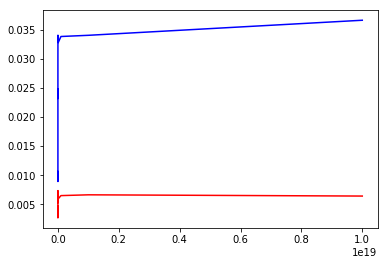

In [7]:
est_complexity()

## Question d
Du à des soucis d'implémentation, j'ai au final choisi de coder une version plus claire de l'exponentiation.

_Source : https://en.wikipedia.org/wiki/Modular_exponentiation#Right-to-left_binary_method_

In [8]:
def my_expo_mod(g,n,N):
    h = 1
    while n>0:
        if n%2 == 1:
            h = (h*g) % N
        n = n // 2
        g = (g*g) % N
    return h

### Tests

In [9]:
assert my_expo_mod(2,3,5)==3
assert my_expo_mod(5,3,5)==0
assert my_expo_mod(7,3,11)==2
assert my_expo_mod(5,6,7)==1

# Exercice 2 : Test naïf et recherche des nombres de Carmichael
## Question a

In [10]:
def first_test(N):
    if N <= 1:
        return False
    for i in range(2,math.floor(math.sqrt(N))+1):
        if N % i == 0:
            return False
    return True


### Tests

In [11]:
assert first_test(1)==False
assert first_test(2)==True
assert first_test(7)==True
assert first_test(8)==False
assert first_test(11)==True
assert first_test(121)==False

## Question b
L'algorithme a une complexité binaire de  O(2^bitsize(n))

## Question c

In [12]:
def count_prime(K=100000):
    cnt = 0
    for i in range(1,K):
        if first_test(i):
            cnt += 1
    return cnt

### Tests
_Source : https://primes.utm.edu/howmany.html_

In [13]:
assert count_prime(100)==25
assert count_prime(1000)==168
assert count_prime(10000)==1229
assert count_prime(100000)==9592

## Question d
J'ai pris la liberté de rajouter un s au nom de la fonction pour pouvoir la différencier de la fonction suivante

De plus ici et dans la suite du projet on commencera généralement les boucles à 4, les premiers cas étant triviaux pouvant poser probleme pour nos tirages aléatoires.

In [14]:
def gen_carmichaels(K=100000, p=128):
    for n in range(4,K):
        if not first_test(n):
            test=True
            for i in range(p):
                a = randrange(2,n)
                if my_pgcd(n,a)==1 and pow(a,n-1,n)!=1:
                    test=False
                    break
            if test:
                yield n

### Tests
_Source : https://primes.utm.edu/glossary/page.php?sort=CarmichaelNumber_

In [15]:
assert (sum([1 for _ in gen_carmichaels()]))==16

## Question e

In [16]:
def is_carmichael(n):
    for a in range(math.ceil(math.sqrt(n))):
        if my_pgcd(a,n)==1 and my_expo_mod(a,n-1,n)!=1:
            return False
    return True

def gen_carmichael(K=100000):
    primes = []
    for i in range(3,K):
        if(first_test(i)):
            primes.append(i)
    primes1 = np.random.permutation(primes)
    primes2 = np.random.permutation(primes)
    primes3 = np.random.permutation(primes)
    for i in primes1:
        for j in primes2:
            for k in primes3:
                if is_carmichael(i*j*k):
                    return i*j*k,i,j,k

### Tests
Vérification grâce à la source suivante
_Source : https://oeis.org/A002997/b002997.txt_

In [17]:
gen_carmichael(K=1000)

(172947529, 613, 307, 919)

## Question f
Attention la fonction tourne 5 minutes

Record = 59

In [18]:
trouves = set()
debut = time()
while (time()-debut)<300:
    k,_,_,_ = gen_carmichael(K=1000)
    trouves.add(k)
len(trouves)

59

## Question g
### Question 1

* p<q<r
* selon le critère de Korselt, si pqr est de carmichael il n'existe pas k tel que k est premier et son carré divise pqr, et pour chaque diviseur premier m de pqr, m-1 divise pqr-1, etc ...
* On a donc r-1 divise pqr-1
* pqr-1 = (r-1)pq + pq - 1
* Donc r-1 divise (r-1)pq _(trivial)_ et pq-1
* Donc pq-1 = h(r-1)
* hors comme r est premier, r =/= pq
* Donc h ne peut être égal à 1 donc h >= 2
* Or h est forcément inférieur à p (et q et r) car si h=p on obtient q=r, ce qui est absurde
* donc 2 <= h <= p-1


## Question h
On peut chercher :

In [19]:
primes = []
for i in range(4,100):
    if(first_test(i)):
        primes.append(i)
for i in range(len(primes)):
    for j in range(i,len(primes)):
        m = primes[i]
        n = primes[j]
        if is_carmichael(3*m*n):
            print(3*m*n,"=","3*",m,"*",n)
for i in range(len(primes)):
    for j in range(i,len(primes)):
        m = primes[i]
        n = primes[j]
        if is_carmichael(5*m*n):
            print(5*m*n,"=","5*",m,"*",n)

561 = 3* 11 * 17
1105 = 5* 13 * 17
2465 = 5* 17 * 29
10585 = 5* 29 * 73


# Exercice 3 : Test de Fermat
## Question a

In [20]:
def test_fermat(n, p=128):
    if n == 2 or n == 3:
        return True
    if n == 4 or n<=1:
        return False
    for i in range(p):
        a = randrange(2,n)
        if my_expo_mod(a,n-1,n)!=1:
            return False
    return True

### Tests

In [21]:
assert test_fermat(4)==False
assert test_fermat(7)==True
assert test_fermat(49)==False
assert test_fermat(121)==False
assert test_fermat(563)==True

## Question b
* J'ai besoin en premier d'une simple fonction pour générer des nombres composés pour faire le test

In [22]:
def gen_comp(K=100000):
    for i in range(3,K):
        if not first_test(i):
            yield i


* Ensuite je veux calculer la probabilité de reconnaissance par type de valeur

In [23]:
def test_test_fermat(K=100000, N=1000, p=128):
    p_car = 0
    p_comp = 0
    p_rand = 0
    car=list(gen_carmichaels(K))
    comp=list(gen_comp(K))
    for i in range(N):
        if test_fermat(int(np.random.choice(car,1)[0])):
            p_car += 1/N
    for i in range(K):
        if test_fermat(int(np.random.choice(comp,1)[0])):
            p_comp += 1/N
    for i in range(N):
        if test_fermat(randrange(3,K),p):
            p_rand += 1/N
    plt.bar(2,p_car,1,label="Carmichael "+str(p_car*100)+"%")
    plt.bar(4,p_comp,1,label="Composé "+str(p_comp*100)+"%")
    plt.bar(6,p_rand,1,label="Random "+str(p_rand*100)+"%")
    plt.title("Probabilité de reconnaissance d'un nombre")
    plt.legend()
    plt.show()

### Test
_Attention, peut être très long à calculer en augmentant K_

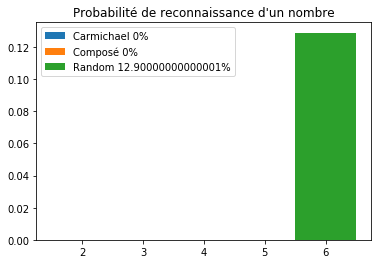

In [24]:
test_test_fermat(K=10000)

## Question c

In [25]:
def est_proba_err_fermat(p=128):
    p = 0
    for i in range(3,100000):
        f = first_test(i)
        g = test_fermat(i,p=128)
        if g and not f:
            p+=1/100000
    return p

### Tests

In [26]:
est_proba_err_fermat(p=128)

0

# Exercice 4 : Test de Rabin et Miller
## Question a

In [27]:
def test_miller_rabin(n, T=128):
    m = n-1
    h = 0
    while m%2==0:
        h+=1
        m=m//2
    for i in range(T):
        a = randrange(2,n)
        b = my_expo_mod(a,m,n)
        if b!= 1 and b!= n-1:
            j = 1
            while j < h and b != n-1:
                if (b*b)%n == 1:
                    return False
                b = (b*b)%n
                j = j+1
            if b != n-1:
                return False
    return True

## Question b

In [28]:
def test_test_miller_rabin(K=100000, N=1000):
    p_car = 0
    p_comp = 0
    p_rand = 0
    car=list(gen_carmichaels(K))
    comp=list(gen_comp(K))
    for i in range(N):
        if test_miller_rabin(int(np.random.choice(car,1)[0])):
            p_car += 1/N
    for i in range(K):
        if test_miller_rabin(int(np.random.choice(comp,1)[0])):
            p_comp += 1/N
    for i in range(N):
        if test_miller_rabin(randrange(3,K)):
            p_rand += 1/N
    plt.bar(2,p_car,1,label="Carmichael "+str(p_car*100)+"%")
    plt.bar(4,p_comp,1,label="Composé "+str(p_comp*100)+"%")
    plt.bar(6,p_rand,1,label="Random "+str(p_rand*100)+"%")
    plt.title("Probabilité de reconnaissance d'un nombre")
    plt.legend()
    plt.show()

### Tests
_Attention, peut être très long à calculer en augmentant K_

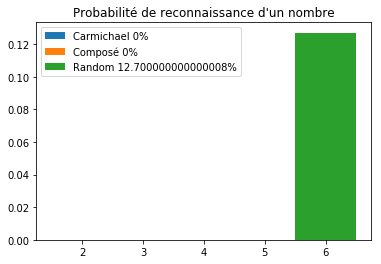

In [29]:
test_test_miller_rabin(K=10000)

## Question c

In [30]:
def est_proba_err_miller_rabin(T=128):
    p = 0
    for i in range(3,100000):
        f = first_test(i)
        g = test_miller_rabin(i,T)
        if g and not f:
            p+=1/100000
    return p

### Tests

In [31]:
est_proba_err_miller_rabin()

0

## Question d

In [32]:
def gen_rsa(t):
    test = False
    while not test:
        p,q = randrange(pow(2,t-1),pow(2,t)+1),randrange(pow(2,t-1),pow(2,t)+1)
        if test_miller_rabin(p) and test_miller_rabin(q):
            test = True
    return p*q,p,q

In [33]:
gen_rsa(25)

(316876301563933, 17146729, 18480277)